 # <font color='purple'> PIA Simulación </font>

##<font color='olive'> Equipo: MATRIX </font>

- ###  Aguilar Sosa Fatima Amaranta 1941582
- ###  Gaytan Gutierrez José Claudio 1855455
- ###  López Verduzco Ruy Aramis 1863861
- ###  Lozano Rangel Antonio De Jesús 1847759
- ###  Sobrevilla Ruiz Rene 1941452
- ###  Ruiz Espitia Thalía 1941494

###<font color='blue'> INDICE </font>

>1.Modelo de inventarios

>2.Manual del usuario

>     2.1 Ejemplos: Resultados

          1.   Ejemplo 
          2.   Ejemplo 
          3.   Ejemplo 

>     2.2 Código


####<font color='teal'> **1.Modelo de inventarios** </font>

Consideremos una tienda que almacena cierto producto, el cual vende a un precio unitario **r**. 

Los clientes que lo solicitan aparecen de acuerdo a un proceso Poisson con razón **λ**, y la cantidad que pide cada uno es una variable aleatoria con distribución **G**. Para cubrir la demanda, el propietario de la tienda debe tener a disposición una cantidad del producto y, siempre que el inventario disminuya, tendrá que ordenar más unidades al distribuidor.

El propietario practica una política de solicitud **(s,S)**, a saber, siempre que el inventario sea menor que **s** y no haya solicitud previa, entonces pide determinada cantidad para que el inventario crezca a **S** (donde s < S).

Es decir, el nivel actual del inventario es **x**, no hay una solicitud pendiente y **x  < s**, entonces se ordena la cantida **S-x**. El costo de solicitud de **y** unidades del producto es la función **c(y)** y se necesitan **L** unidades de tiempo para entrega de un pedido; el pago se realiza al momento de la entrega.

Además, la tienda paga un costo de mantenimiento del inventario de **h** por cada artículo, por unidad de tiempo. Suponga que además siempre que un cliente demande una cantidad mayor del producto de la existente, entonces se vende la cantidad a la mano y el resto del pedido representa una pérdida para la tienda.


####<font color='teal'> **2.Manual del usuario** </font>

Para la resolución del problema antes planteado, se tienen que definir primero las variables constantes que serán las únicas que podrán ser reemplazadas en el código. 

Estas variables representan : 

- Numero de clientes promedio por día. (lamda)
- Tiempo de la simulación. (Time)
- Cantidad de inventario minímo. (s)
- Cantidad de inventario máximo. (S)
- Dias para la entrega de un pedido. (L)
- Precio unitario. (r)
- Costo de mantenimiento por unidad por dia. (h)

Entonces, para aplicar la simulación para estimar la ganancia esperada de la tienda hasta cierto tiempo T , se defienen las siguientes variables :

- **t**, Variable del tiempo.
- **x,y**, Variables de estado del sistema, *x* es la cantidad de inventario a la mano y *y* es la cantidad solicitada.
- **C**, Cantidad total de costos hasta el tiempo t.
- **H**, Cantidad total de costos de mantenimiento de inventario hasta el tiempo t. 
- **R**, Cantidad total de ingresos obtenidos hasta el tiempo t.

Se considera evento la llegada de un cliente o de un pedido, con tiempos de evento :


- **t0**, Tiempo de llegada del siguiente cliente
- **t1**, Tiempo de entrega de un pedido. 

Con esto definido se procede a un plan de actualizazión, considerando el mínimo de los tiempos de evento, contando con 2 casos:

1.- t0 < t1

2.-t1 <= t0

Este plan de actualización permite escribir un programa de simulación para analizar el modelo . Entonces podríamos ejecutar la simulación hasta que ocurra el primer evento posterior a cierto valor del tiempo T predeterminado, grande, y luego emplear (R-C-H)/T como estimación de la ganancia promedio de la tienda por unidad de tiempo. Al hacer esto para diversos valores de s y S, podríamos determinar una buena política de pedidos para la tienda.

##### <font color='TEAL'> **2.1** Ejemplos: Resultados </font> 

###### **1.Ejemplo**

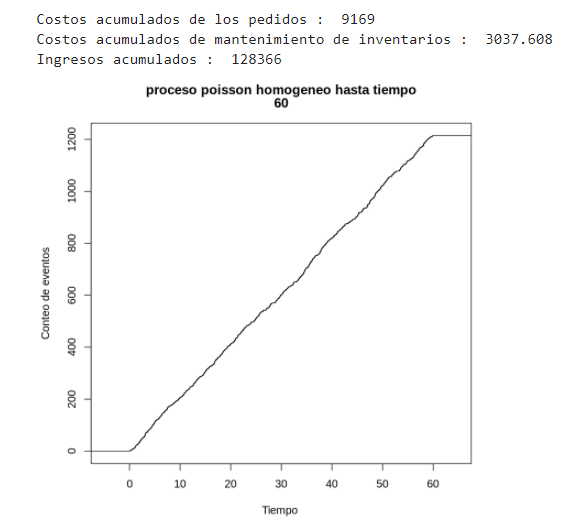

###### **2.Ejemplo**

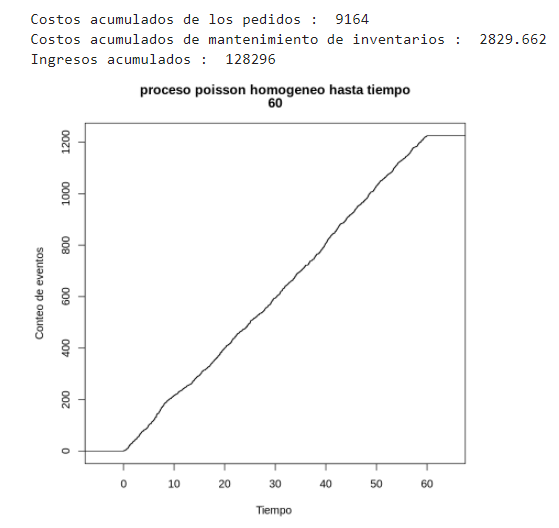

###### **3. Ejemplo**

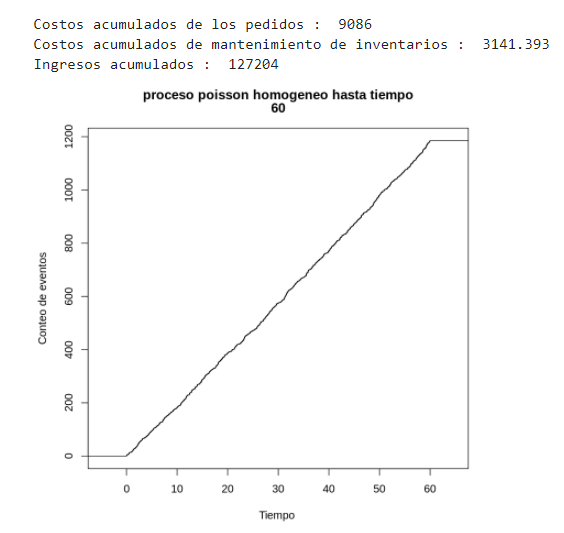

##### <font color='TEAL'> **2.2** Código </font> 

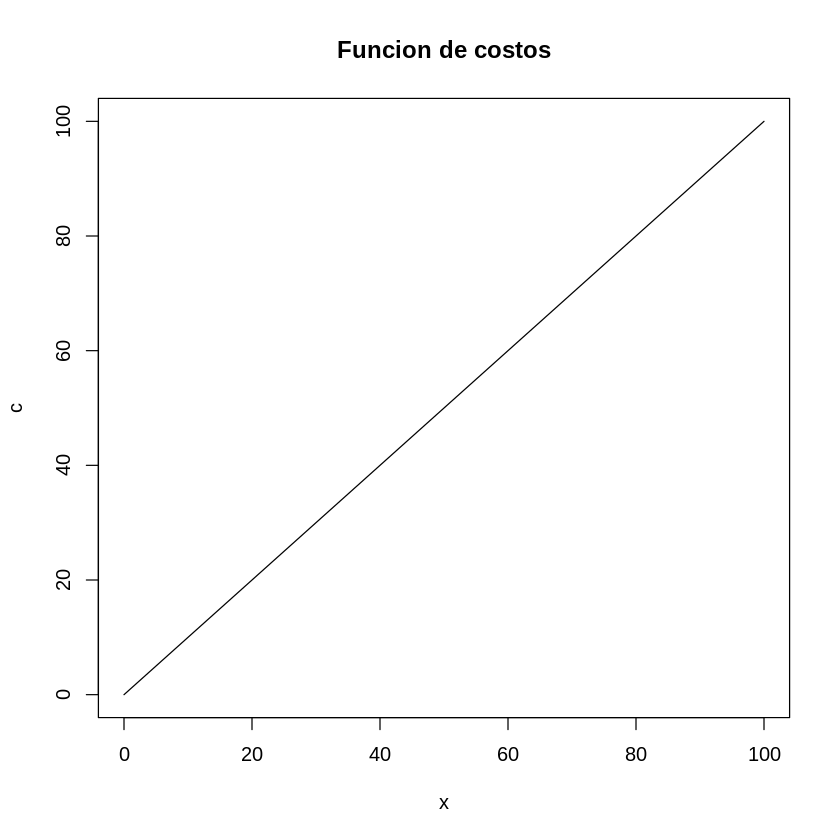


Costos acumulados de los pedidos :  8773 
Costos acumulados de mantenimiento de inventarios :  3729.829 
Ingresos acumulados :  122822 



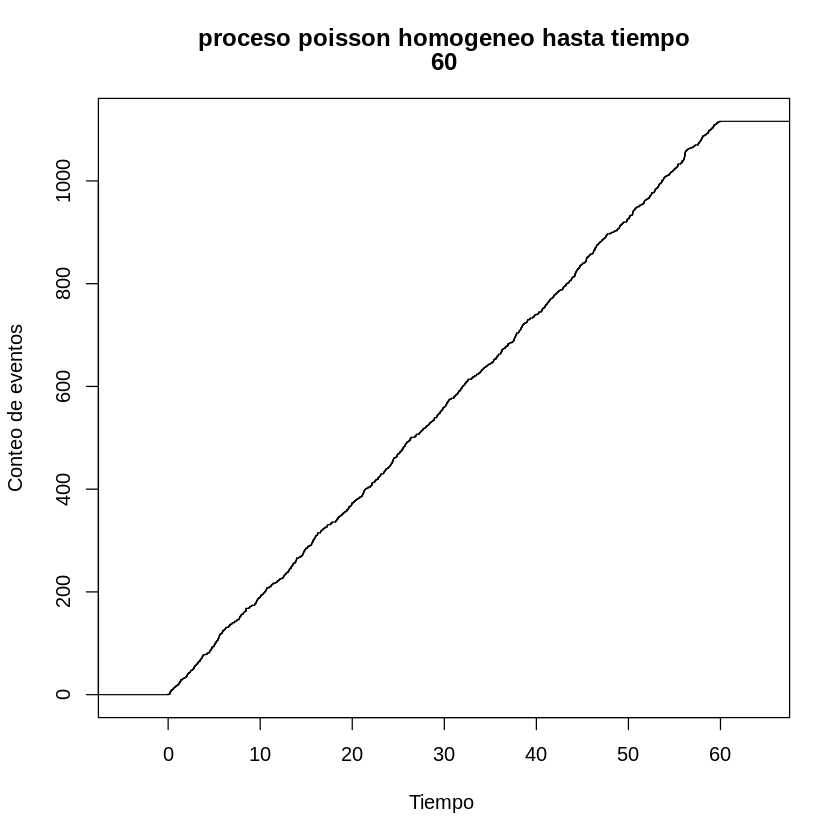

In [3]:
ppois2 <- function(B,lambda){
  t <- c(0)
  sn <- c(0)
  repeat{
    u <- runif(1)
    t <- c(t,-1/lambda*log(u))
    
    if (sum(t) < B){
      sn <- c(sn,sum(t))
      sn
    } else{
      n <- length(t)-1
      break
    }
  }
  plot(stepfun(sn,c(0:n)), do.points = F, xlab = "Tiempo ", ylab="Conteo de eventos",main = c("proceso poisson homogeneo hasta tiempo",B))
  return(sn)
}
  #CONSTANTES 
lambda <- 20 #Numero de clientes promedio por dia 
Time <- 60 #Simulacion hasta este tiempo
s <- 100 #Inventario minimo
S <- 200 #Inventario maximo
L <- 1 #Dias para la entrega de un pedido
r <- 14 #Precio unitario 
h <- 3 #Costo de mantenimiento por unidad por dia
costos <- function(x) 3*sqrt(x)+log(x) #Funcion de costos por solicitud de y unidades
plot(c,0,100, main = "Funcion de costos")
G <- function(x){rgamma(x,70,0.5)} #Distribucion de la demanda

sn <- ppois2(Time,lambda) #Tiempos de arribos de clientes

  #VARIABLES DE CONTEO 
C = 0 #Costos acumulados de los pedidos
H = 0 #Costos acumulados de mantenimiento de inventarios 
R = 0 #Ingresos acumulados

  #ESTADO DEL SISTEMA
x = 0 #Cantidad de inventario a la mano
y = 0 #Cantidad de inventario solicitada 

  #TIEMPOS DE EVENTOS
t0 <- 0 #Tiempo de llegada del siguiente cliente
t1 <- Inf #Tiempo de llegada de un pedido

#El ciclo se repite hasta el tiempo Time,
#usando los tiempos de arribo de cada cliente en t
t = 0
for (i in 1:length(sn)){
  t0 <- sn[i]
  if (t0 < t1){
    #(t0 - t)*h costo del mantenimiento para las h unidades
    H <- H + (t0 - t)*x*h
    
    t <- t0
    
    #Generar variable de Demanda 
    D <- ceiling(G(1))
    
    #Cantidad del pedido a cubrir
    w <- min(D,x)
    
    #Inventario despues del pedido a cubrir
    x <- x - w
    
    #Ingresos
    R <- R + w*r
    
    if (x < s & y == 0) {
      y <- S - x
      t1 <- t + L
      }
    }
  
  
  else{
    H <- H + (t1 -t)*x*h
    t <- t1
    C <- C + c(y)
    x <- x + y
    y <- 0
    t1 <- Inf
  }
  
}

cat("\nCostos acumulados de los pedidos : ",C,"\nCostos acumulados de mantenimiento de inventarios : ",H,"\nIngresos acumulados : ",R,"\n\n")
